In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

import lda.datasets # 使用第三方的lda库，安装方式: pip install lda
from pprint import pprint

In [2]:
# 加载数据
# 词袋法&TF-IDF转换之后的X矩阵
X = lda.datasets.load_reuters()
print("训练文本数据X的类型: {}".format(type(X)))
print("训练文本数据X的大小: {}".format(X.shape))
print(X[:10, :10])


# 词汇表
vocab = lda.datasets.load_reuters_vocab()
print("\n词汇表数据类型: {}".format(type(vocab)))
print("词汇表数据大小: {}".format(len(vocab)))
print(vocab[:10])


titles = lda.datasets.load_reuters_titles()
print("\n文档名称对象数据类型: {}".format(type(titles)))
print("文档数量: {}".format(len(titles)))
pprint(titles[:10])

训练文本数据X的类型: <class 'numpy.ndarray'>
训练文本数据X的大小: (395, 4258)
[[ 1  0  1  0  0  0  1  0  0  1]
 [ 7  0  2  0  0  0  0  1  0  0]
 [ 0  0  0  1 10  0  4  1  1  0]
 [ 6  0  1  0  0  0  1  1  1  0]
 [ 0  0  0  2 14  1  1  0  2  1]
 [ 0  0  2  2 24  0  2  0  2  1]
 [ 0  0  0  2  7  1  1  0  1  0]
 [ 0  0  2  2 20  0  2  0  3  1]
 [ 0  1  0  2 17  2  2  0  0  0]
 [ 2  0  2  0  0  2  0  1  0  3]]

词汇表数据类型: <class 'tuple'>
词汇表数据大小: 4258
('church', 'pope', 'years', 'people', 'mother', 'last', 'told', 'first', 'world', 'year')

文档名称对象数据类型: <class 'tuple'>
文档数量: 395
('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20',
 '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany '
 '1996-08-21',
 "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23",
 '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25',
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25',
 "5 INDIA: Mother Teresa's

In [3]:
# 数据测试
#下面是测试文档编号为64，单词编号为2119的数据，X[64,2119]：
doc_id = 64
word_id = 2119
print("文档id: {} 单词id: {}".format(doc_id, word_id))
print("-- 出现数量  : {}".format(X[doc_id, word_id]))
print("-- 单词为    : {}".format(vocab[word_id]))
print("-- 文档名称  : {}".format(titles[doc_id]))

文档id: 64 单词id: 2119
-- 出现数量  : 9
-- 单词为    : llosa
-- 文档名称  : 64 GERMANY: Vargas Llosa urges sanctions on rights abuses. FRANKFURT 1996-10-06


In [4]:
# 训练集和测试集获取
random.seed(28)
random.shuffle(X)
X_train = X[:300]
X_test = X[300:]
print("训练集大小:{}".format(len(X_train)))
print("测试集大小:{}".format(len(X_test)))

训练集大小:300
测试集大小:95


In [5]:
# 模型训练
topic_num = 20
# n_topics: 给定主题的数目
# n_iter: 给定迭代次数，默认2000
# alpha: 给定主题分布的Dirichlet参数，默认0.1
# eta: 给定词分布的Dirichlet参数，默认0.01
model = lda.LDA(n_topics=topic_num, n_iter=500, random_state=28)
model.fit(X_train)

INFO:lda:n_documents: 300
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 66760
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -819816
INFO:lda:<10> log likelihood: -532386
INFO:lda:<20> log likelihood: -512472
INFO:lda:<30> log likelihood: -505420
INFO:lda:<40> log likelihood: -500555
INFO:lda:<50> log likelihood: -497056
INFO:lda:<60> log likelihood: -494495
INFO:lda:<70> log likelihood: -493021
INFO:lda:<80> log likelihood: -491439
INFO:lda:<90> log likelihood: -489264
INFO:lda:<100> log likelihood: -488298
INFO:lda:<110> log likelihood: -486877
INFO:lda:<120> log likelihood: -485792
INFO:lda:<130> log likelihood: -484540
INFO:lda:<140> log likelihood: -484065
INFO:lda:<150> log likelihood: -483278
INFO:lda:<160> log likelihood: -482771
INFO:lda:<170> log likelihood: -482494
INFO:lda:<180> log likelihood: -481552
INFO:lda:<190> log likelihood: -481489
INFO:lda:<200> log likelihood: -481231
INFO:lda:<210> log likelihood: -481055
INFO:lda:<220> log likelihood: -48

In [6]:
# 模型预测，得到文档-主题映射关系
doc_topic = model.transform(X_test)
print("大小:{}".format(doc_topic.shape))
pd.DataFrame(doc_topic).head()

大小:(95, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.074000,0.013247,0.028491,0.002549,0.001343,0.000181,0.004198,0.000303,0.001029,0.415477,0.000865,0.052642,0.062461,0.013149,0.012515,0.012275,0.088725,0.006927,0.133959,0.075665
1,0.000322,0.000272,0.000494,0.018500,0.006573,0.000670,0.006529,0.000514,0.000104,0.001781,0.001263,0.000069,0.033008,0.000227,0.003694,0.000956,0.902153,0.003520,0.007889,0.011461
2,0.000468,0.879013,0.000060,0.000093,0.000055,0.000064,0.000121,0.000075,0.000084,0.000125,0.000118,0.000084,0.000129,0.000071,0.000098,0.000075,0.000063,0.000093,0.119001,0.000111
3,0.000940,0.083802,0.000588,0.001580,0.000357,0.001378,0.001088,0.000710,0.055241,0.000725,0.015059,0.117502,0.007899,0.007292,0.000910,0.001438,0.573514,0.010594,0.016505,0.102878
4,0.115845,0.001868,0.007448,0.087342,0.054296,0.001866,0.098097,0.039444,0.069650,0.042488,0.003239,0.147523,0.000932,0.002680,0.075250,0.066623,0.037218,0.022353,0.004222,0.121616


In [7]:
# 获取模型的主题词
topic_word = model.topic_word_
print("主题词数据类型: {}".format(type(topic_word)))
print("主题词数量: {}".format(topic_word.shape))
print(vocab[:3])
print(topic_word[:, :3])

for n in range(5):
    # 计算当前主题对应的所有词汇的概率
    sum_pr = sum(topic_word[n, :])
    print("主题: {} 概率和: {}".format(n, sum_pr))

# 每个主题中的前7个单词
n = 7
for i, topic_dist in enumerate(topic_word):
    # np.argsort => 对当前主题中各个单词的频率按照从小到大排序，返回索引值
    # np.array(vocab)[np.argsort(topic_dist)] => 获取从小到大排序后的单词(频率/概率)
    # np.array(vocab)[np.argsort(topic_dist)][:-(n + 1):-1] => 获取最后的n个单词
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n + 1):-1]
    print('*主题 {}\n- {}'.format(i, ' '.join(topic_words)))

# 计算输入前10篇文字最可能的topic
doc_topic = model.doc_topic_
print("文档主题数据类型: {}".format(type(doc_topic)))
print("文档主题数据大小: {}".format(doc_topic.shape))
for i in range(10):
    topic_most_pr = doc_topic[i].argmax()
    print(u"文档: {} 主题: {} value: {}".format(i, topic_most_pr, doc_topic[i][topic_most_pr]))

主题词数据类型: <class 'numpy.ndarray'>
主题词数量: (20, 4258)
('church', 'pope', 'years')
[[2.29108793e-02 4.66887820e-02 5.82848593e-04]
 [7.98818405e-03 4.43541591e-06 6.21401769e-03]
 [2.65704462e-06 2.65704462e-06 6.37956414e-03]
 [2.30189725e-02 2.47489222e-06 2.97234555e-03]
 [3.37276012e-04 3.33936646e-06 3.33936646e-06]
 [4.82216994e-03 4.01512901e-06 6.42822154e-03]
 [4.06904353e-06 4.06904353e-06 5.70072999e-03]
 [4.93822195e-03 1.82829395e-06 6.40085710e-03]
 [7.99181461e-03 3.07259308e-06 3.07259308e-06]
 [1.08134799e-02 2.92177246e-06 4.09340322e-03]
 [6.55292546e-03 4.36570650e-06 4.37007221e-03]
 [1.39036744e-02 3.39031320e-06 3.39031320e-06]
 [2.79887247e-03 1.20179831e-03 3.99268540e-06]
 [1.56016463e-06 1.40570833e-03 3.43392235e-03]
 [3.59011373e-02 3.81886366e-06 1.60430462e-02]
 [1.65078597e-02 3.66759824e-06 3.66759824e-06]
 [3.57835524e-06 3.57835524e-06 3.57835524e-06]
 [1.91183301e-03 3.18108653e-06 1.05007666e-02]
 [1.26477681e-02 9.61522529e-02 2.18027376e-06]
 [2.50590

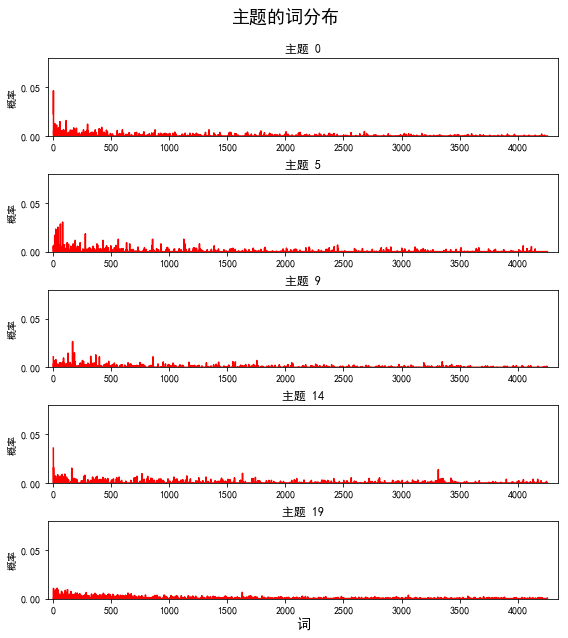

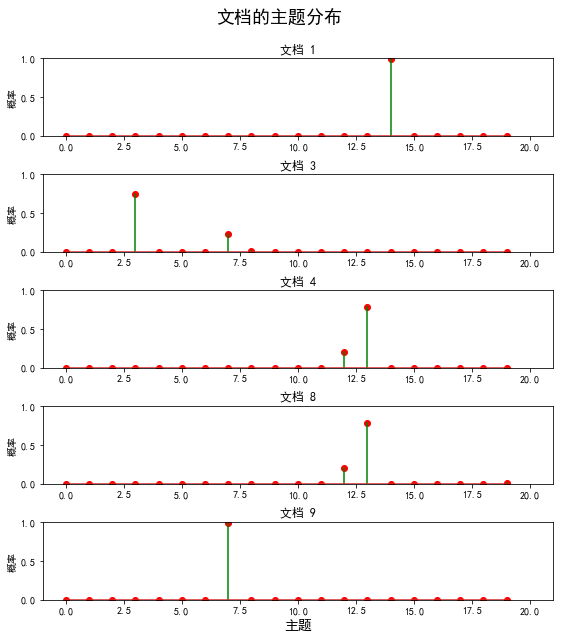

In [8]:
# 防止画图中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
# 计算每个主题中单词权重分布情况：
plt.figure(figsize=(8, 9))
# f, ax = plt.subplots(5, 1, sharex=True)
for i, k in enumerate([0, 5, 9, 14, 19]):
    ax = plt.subplot(5, 1, i+1)
    ax.plot(topic_word[k, :], 'r-')
    ax.set_xlim(-50, 4350)   # [0,4258]
    ax.set_ylim(0, 0.08)
    ax.set_ylabel(u"概率")
    ax.set_title(u"主题 {}".format(k))
plt.xlabel(u"词", fontsize=14)
plt.tight_layout()
plt.suptitle(u'主题的词分布', fontsize=18)
plt.subplots_adjust(top=0.9)
plt.show()

# 计算每个文档的主题分布情况
plt.figure(figsize=(8, 9))
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax = plt.subplot(5, 1, i+1)
    ax.stem(doc_topic[k, :], linefmt='g-', markerfmt='ro')
    ax.set_xlim(-1, topic_num+1)
    ax.set_ylim(0, 1)
    ax.set_ylabel(u"概率")
    ax.set_title(u"文档 {}".format(k))
plt.xlabel(u"主题", fontsize=14)
plt.suptitle(u'文档的主题分布', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
